# ICTS IAGRG SCHOOL 3

*Cosmic Tensions and Early Dark Energy*

**The Cosmological Standard Model, its tensions and new physics**

Lectures by Florian Niedermann 

Tutorials by Purba Mukherjee

Email: purba16@gmail.com

In [1]:
import os
import subprocess

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.constants import c as c_kms

c = c_kms/1000.

# Trigger CLASS

In [2]:
directory = "TriggerCLASS"
repo_url = "https://github.com/NEDE-Cosmo/TriggerCLASS.git"

if not os.path.isdir(directory):
    print(f"Directory {directory} does not exist. Cloning repository...")
    try:
        result = subprocess.run(["git", "clone", repo_url], check=True, capture_output=True, text=True)
        print(result.stdout)
        print(f"Repository cloned successfully into {directory}.")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while cloning the repository: {e.stderr}")
else:
    print(f"Directory {directory} already exists.")

Directory TriggerCLASS already exists.


**Installing TriggerCLASS**

Open Terminal:

$ cd class_public

$ make -j // PYTHON=python3 make -j

$ cd python

$ python setup.py build

$ python setup.py install --user

In [3]:
import classy
classy.__version__

'v2.9.4'

In [4]:
from classy import Class

In [5]:
Trigger = Class()
Trigger.set({'Omega_cdm':0.25,'Omega_b':0.05,'f_NEDE':0.20,'z_decay_NEDE':4300})
Trigger.compute()

In [6]:
zz = np.linspace(0, 10, 1001)

H0_trigger = Trigger.Hubble(0)*c
Hz_trigger = []

for i in range(len(zz)):
    Hz_trigger.append(Trigger.Hubble(zz[i])*c)

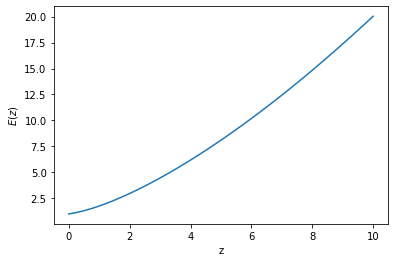

In [7]:
plt.xlabel("z")
plt.ylabel("$E(z)$")
plt.plot(zz, np.array(Hz_trigger)/H0_trigger)

plt.show()

# Computing $C_l$'s 

In [8]:
lcdm_settings = {'output':'tCl,pCl,lCl',
        # LambdaCDM parameters
        'h':0.67556,
        'omega_b':0.022032,
        'omega_cdm':0.12038,
        'A_s':2.215e-9,
        'tau_reio':0.0925}

**computing scalars only**

In [9]:
M = Class()
M.set(lcdm_settings)
M.set({'modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M.compute()
cls = M.raw_cl(3000)
M.struct_cleanup()
M.empty()

**computing tensors only**

In [10]:
M = Class()
l_max_tensors = 600
M.set(lcdm_settings)
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,'l_max_tensors':l_max_tensors})
M.compute()
clt = M.raw_cl(l_max_tensors)
M.struct_cleanup()
M.empty()

**scalars + tensors (only in this case we can get the correct lensed ${C_l}_{\rm BB}$)**

In [11]:
M = Class()
M.set(lcdm_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','r':0.1,'n_s':0.9619,'n_t':0,'l_max_scalars':3000,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.struct_cleanup()
M.empty()

**TT TE and EE power spectra**

In [12]:
cls

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.56543608e-10, ...,
        2.29591607e-18, 2.29224804e-18, 2.28857499e-18]),
 'ee': array([0.00000000e+00, 0.00000000e+00, 7.64711529e-15, ...,
        7.58706833e-20, 7.51672379e-20, 7.44634798e-20]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  5.04454687e-13, ...,
        -1.72325625e-19, -1.70871362e-19, -1.69389012e-19]),
 'bb': array([0., 0., 0., ..., 0., 0., 0.]),
 'pp': array([0.00000000e+00, 0.00000000e+00, 9.21449937e-09, ...,
        3.59779355e-23, 3.58916498e-23, 3.58056184e-23]),
 'tp': array([0.00000000e+00, 0.00000000e+00, 5.08514141e-10, ...,
        4.42160310e-24, 4.40183006e-24, 4.38173647e-24]),
 'ell': array([   0,    1,    2, ..., 2998, 2999, 3000])}

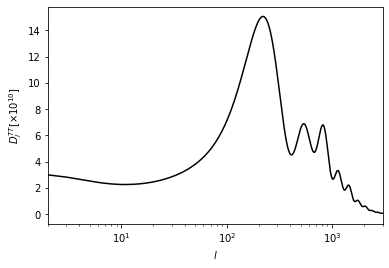

In [13]:
plt.xlim([2.,3000])
#plt.ylim([0.1,10])
plt.plot(cls['ell'], 1e10* cls['ell']*(cls['ell']+1.)/math.pi * cls['tt'],'k-',label=r'$\mathrm{TT(s)}$', lw=1.5)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$D_l^{TT} [{\times} 10^{10}]$')
plt.xlabel(r'$l$')
plt.show()

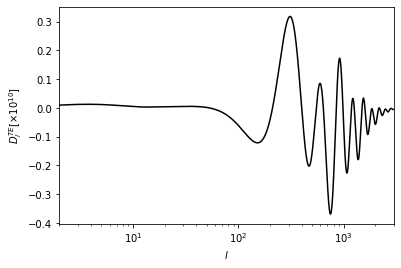

In [14]:
plt.xlim([2.,3000])
#plt.ylim([0.1,10])
plt.plot(cls['ell'], 1e10* cls['ell']*(cls['ell']+1.)/math.pi * cls['te'],'k-',label=r'$\mathrm{TT(s)}$', lw=1.5)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$D_l^{TE} [{\times} 10^{10}]$')
plt.xlabel(r'$l$')
plt.show()

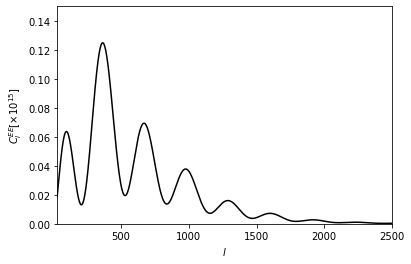

In [15]:
plt.xlim([30.,2500])
plt.ylim([0.,0.15])
plt.plot(cls['ell'], 1e15 * cls['ee'],'k-',label=r'$\mathrm{EE(s)}$', lw=1.5)
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$C_l^{EE} [{\times} 10^{15}]$')
plt.xlabel(r'$l$')
plt.show()

**comparison between scalar, tensor and scalar + tensor**

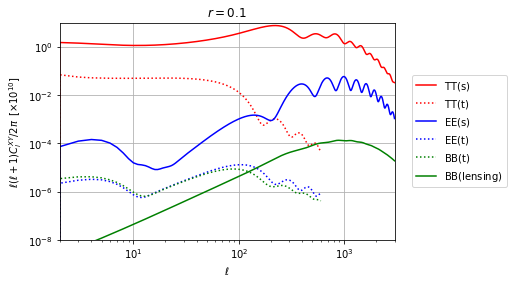

In [16]:
plt.xlim([2,3000])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
factort = 1.e10*ellt*(ellt+1.)/2./math.pi
#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.legend(loc='right',bbox_to_anchor=(1.35, 0.5))
plt.show()

**Do the similar exercise with TriggerCLASS**

# **Problem 8 <span style="color:blue">[Boltzmann solver]</span>:**

**(a) Follow the instructions on the website to install the software on your laptop.**

**(b) Plot the CMB temperature power spectrum for the ΛCDM cosmology.**

**(c) Increase the value of $H_0$ to the SH0ES value while keeping the angular size of the sound horizon $\theta_s$ fixed.**

This can be achieved by lowering the (dimensionless) cold dark matter density $\omega_{\rm cdm}$

**How does the power spectrum change after this position adjustment ?**

**(d) Run the typical new early dark energy cosmology. Show that increasing $f_{\rm NEDE}$ and increasing $H_0$ act oppositely on the temperature power spectrum.**

*Again, keep $\theta_s$ fixed by adapting $\omega_{\rm cdm}$*

# Matter Power Spectrum

**Linear $P(k)$**

In [17]:
lcdm_params = {
    'output': 'mPk',                   # Matter power spectrum
    'P_k_max_1/Mpc': 1.0,              # Maximum k (1/Mpc)
    'z_pk': '0.0,1.0,2.0',             # Redshifts for P(k)
    'h': 0.67,                         # Hubble parameter h
    'Omega_b': 0.022,                  # Baryon density
    'Omega_cdm': 0.12,                 # Cold dark matter density
    'A_s': 2.1e-9,                     # Scalar amplitude
    'n_s': 0.965                       # Spectral index
}

cosmo = classy.Class()
cosmo.set(lcdm_params)
cosmo.compute()

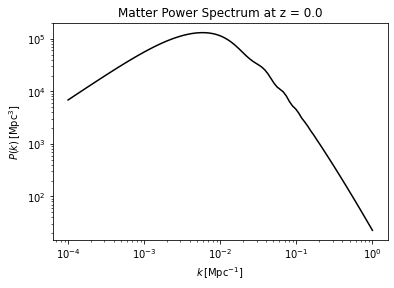

In [18]:
k_vals = np.logspace(-4, 0, 100)  # k in 1/Mpc

# Extract P(k) at redshift z = 0
z = 0.0
pk_vals = np.array([cosmo.pk(k, z) for k in k_vals])

# Plot the power spectrum
plt.loglog(k_vals, pk_vals, c ='k')
plt.xlabel(r'$k \, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}^3]$')
plt.title(f'Matter Power Spectrum at z = {z}')
plt.show()

# Clean up
cosmo.struct_cleanup()
cosmo.empty()

**Non-linear $P(k)$ <span style="color:blue">[Using Halofit]</span>:**

In [19]:
lcdm_params = {
    'output': 'mPk',                   # Matter power spectrum
    'P_k_max_1/Mpc': 1.0,              # Maximum k (1/Mpc)
    'z_pk': '0.0,1.0,2.0',             # Redshifts for P(k)
    'h': 0.67,                         # Hubble parameter h
    'Omega_b': 0.022,                  # Baryon density
    'Omega_cdm': 0.12,                 # Cold dark matter density
    'A_s': 2.1e-9,                     # Scalar amplitude
    'n_s': 0.965,                      # Spectral index
    'non linear': 'halofit'            # Include non-linear corrections with Halofit
}

cosmo = classy.Class()
cosmo.set(lcdm_params)
cosmo.compute()

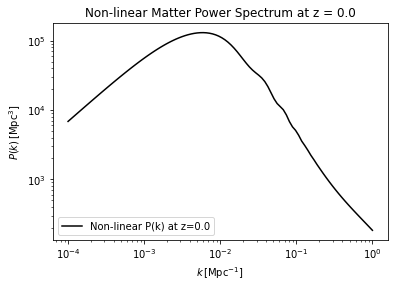

In [20]:
# Define a range of k values (in 1/Mpc)
k_vals = np.logspace(-4, 0, 100)

# Extract non-linear P(k) at redshift z = 1100
z = 0.
pk_nl_vals = np.array([cosmo.pk(k, z) for k in k_vals])

# Plot the non-linear power spectrum
plt.loglog(k_vals, pk_nl_vals, label=f'Non-linear P(k) at z={z}', c='k')
plt.xlabel(r'$k \, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}^3]$')
plt.title(f'Non-linear Matter Power Spectrum at z = {z}')
plt.legend()
plt.show()

# Clean up
cosmo.struct_cleanup()
cosmo.empty()

**Comparison**

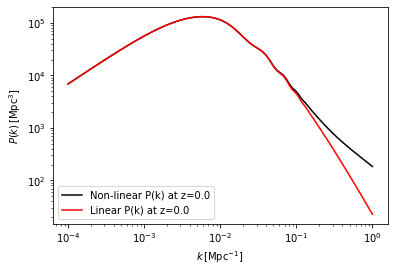

In [21]:
plt.loglog(k_vals, pk_nl_vals, label=f'Non-linear P(k) at z={z}', c='k', ls='-')
plt.loglog(k_vals, pk_vals, label=f'Linear P(k) at z={z}', c='r')
plt.xlabel(r'$k \, [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k) \, [\mathrm{Mpc}^3]$')
plt.legend()
plt.show()

**1. Compare the linear $P(k)$ vs $k$ obtained for $\Lambda$CDM cosmology and NEDE model with TriggerCLASS**

**2. Plot $\frac{P(k)_{\rm linear \vert NEDE}}{P(k)_{\rm linear \vert \Lambda CDM}} - 1$ vs $k$ obtained for $\Lambda$CDM cosmology and NEDE model with TriggerCLASS**